# Using the Experiment class

In [1]:
import phial.experiment as ws
import phial.toolbox  as tb
import phial.node_functions as nf
from phial.experiment import Experiment
from phial.utils import tic,toc
tic() # start tracking time of Notebook load

In [2]:
exp = Experiment(
    [('A', 'B'), # ('A', 'C'), 
     ('B', 'A'), ('B', 'C'), 
     ('C', 'A'), ('C', 'B')],
    funcs=dict(A=nf.OR_func, B=nf.AND_func, C=nf.XOR_func),
    title='3-node mostly bidirectional OR, XOR, AND',  
    comment = 'from pyphi/examples.py',
)
exp.info()

{'timestamp': 'None',
 'duration': None,
 'results': {},
 'filename': None,
 'uname': uname_result(system='Linux', node='chimp20', release='5.3.0-51-generic', version='#44~18.04.2-Ubuntu SMP Thu Apr 23 14:27:18 UTC 2020', machine='x86_64', processor='x86_64')}

In [3]:
%time exp.run(plot=False)

CPU times: user 87.4 ms, sys: 228 ms, total: 316 ms
Wall time: 443 ms


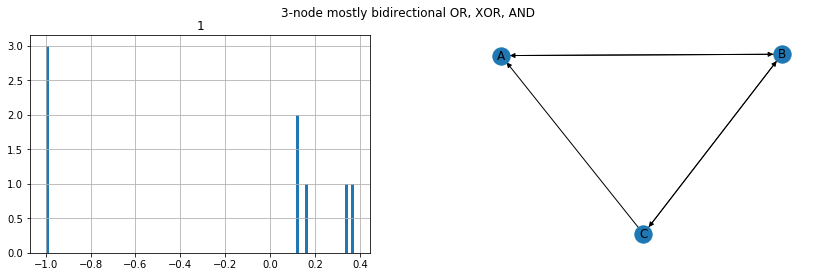

In [4]:
exp.analyze(countUnreachable=True)

## Assign node function from list of all possible functions

In [5]:
gnf = exp.get_num_funcs
gnf

{'A': 16, 'B': 16, 'C': 4}

In [8]:
exp.gen_tpm(dict(A=8))

,A,B,C
000,0,0,0
100,0,0,0
010,1,0,1
110,1,0,1
001,1,0,0
101,1,1,0
011,0,0,1
111,0,1,1


In [9]:
exp.net.get_node('A').func.true_states

((0, 1), (1, 0))

CPU times: user 235 ms, sys: 481 ms, total: 716 ms
Wall time: 546 ms


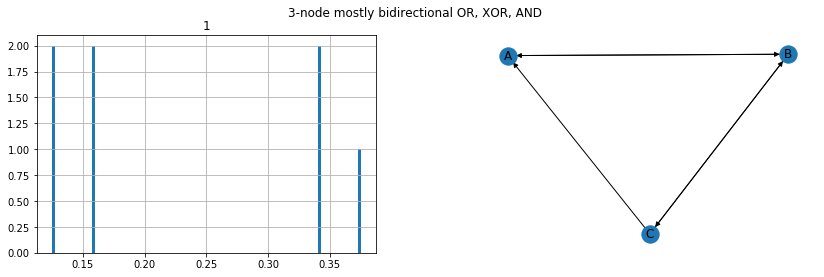

In [15]:
%time exp.run(plot=True)

In [20]:
exp.gen_tpm(dict(A=0,B=0,C=0)) # node funcs never return 1

,A,B,C
000,0,0,0
100,0,0,0
010,0,0,0
110,0,0,0
001,0,0,0
101,0,0,0
011,0,0,0
111,0,0,0


In [18]:
exp.net.get_node('A').func.true_states

()

CPU times: user 176 ms, sys: 259 ms, total: 435 ms
Wall time: 144 ms


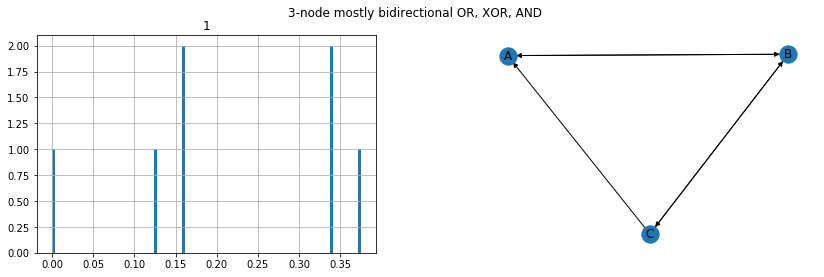

In [19]:
%time exp.run(plot=True)

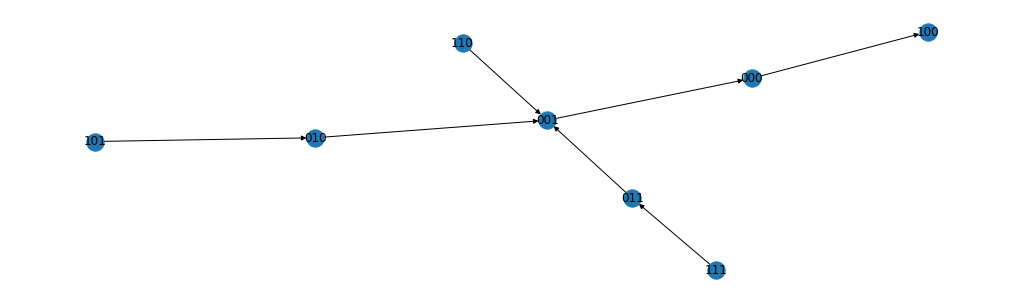

In [12]:
exp.net.draw_states()

In [13]:
exp.net.tpm

,A,B,C
000,1,0,0
100,1,0,0
010,0,0,1
110,0,0,1
001,0,0,0
101,0,1,0
011,0,0,1
111,0,1,1


In [14]:
dict(zip(range(len(exp.net.tpm.index)), exp.net.tpm.index))

{0: '000',
 1: '100',
 2: '010',
 3: '110',
 4: '001',
 5: '101',
 6: '011',
 7: '111'}